In [1]:
%matplotlib inline

import numpy as np

import menpo.io as mio
from menpo.visualize import visualize_images

from alaborticcv2015.deepconvkernel.generative import GenerativeNetwork, learn_pca_filters, learn_ica_filters
from alaborticcv2015.utils import (
    centralize, normalize_norm, normalize_std)

# Learn Generative Network

Load images:

In [2]:
images = []
for i in mio.import_images('~/PhD/DataBases/faces/lfpw/trainset/', verbose=True, 
                           max_images=10):
    
    i.crop_to_landmarks_proportion_inplace(1)
    i = i.rescale_landmarks_to_diagonal_range(100)
    images.append(i)

- Loading 10 assets: [====================] 100%

In [10]:
network = GenerativeNetwork(
    learn_filters=[learn_pca_filters, learn_ica_filters], 
    n_filters=[[8, 4], 4, 2],             
    n_layers=3, 
    patch_size=(5, 5), 
    mode='same', 
    boundary='constant', 
    dtype=np.float32)

In [11]:
print network._n_filters
print network._learn_filters

[[8, 4], [4, 4], [2, 2]]
[[<function learn_pca_filters at 0x108f0b9b0>, <function learn_ica_filters at 0x108f0ba28>], [<function learn_pca_filters at 0x108f0b9b0>, <function learn_ica_filters at 0x108f0ba28>], [<function learn_pca_filters at 0x108f0b9b0>, <function learn_ica_filters at 0x108f0ba28>]]


In [12]:
print 'Network layers:', network.n_layers
print 'Network filters:', network.n_filters
print 'Network filters:', network.n_filters_layer

Network layers: 3
Network filters: 24
Network filters: [12, 8, 4]


In [11]:
network.learn_network_from_grid(
    images,
    stride=(2, 2),
    verbose=True,
    normalize=centralize)

- Learning network: [                    ] 0%

AttributeError: 'list' object has no attribute 'pixels'

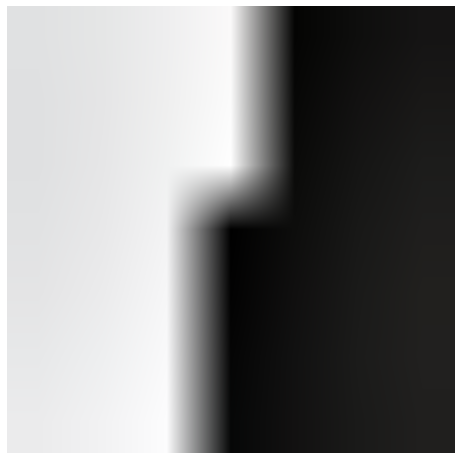

In [26]:
visualize_images(network.filters[0])

In [27]:
response = network.compute_network_response(images[0])

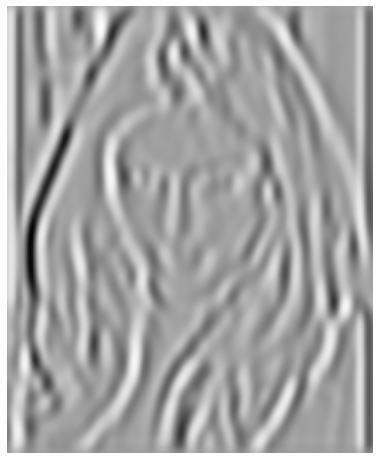

In [29]:
response.view_widget()

# Profile 

Runtime:

In [32]:
import line_profiler
import IPython

ip = IPython.get_ipython()
ip.define_magic('lprun', line_profiler.magic_lprun)

In [35]:
network = GenerativeNetwork(
    learn_filters=learn_pca_filters, 
    n_filters=8,             
    n_layers=1, 
    patch_size=(7, 7), 
    mode='same', 
    boundary='constant', 
    dtype=np.float32)

%lprun -f GenerativeNetwork._learn_network network.learn_network_from_grid(images, verbose=True)

- Learning network: Done!


Memory:

In [41]:
import memory_profiler
import IPython

ip = IPython.get_ipython()
ip.define_magic('mprun', memory_profiler.magic_mprun)

In [42]:
network = GenerativeNetwork(
    learn_filters=learn_pca_filters, 
    n_filters=8,             
    n_layers=1, 
    patch_size=(7, 7), 
    mode='same', 
    boundary='constant', 
    dtype=np.float32)

%mprun -f GenerativeNetwork._learn_network network.learn_network_from_grid(images, verbose=True)

- Learning network: Done!
('',)
